Look at the stellar density maps used by MAF, generated by multiple queries to the CatSim database

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Load up the data, copy the keys into variables
data = np.load('starDensity_r_nside_64.npz')
# Cumulative number counts, units of stars/sq deg. Array at healpix locations
starDensity = data['starDensity'].copy()
# magnitude bins 
bins=data['bins'].copy()
# pixels where there were so many stars some were skipped
mask = data['overMaxMask']

In [3]:
# Generate the ra, dec array from healpy
nside = hp.npix2nside(np.size(mask))
lat,ra = hp.pix2ang(nside, np.arange(np.size(mask)))
dec = np.pi/2-lat

/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


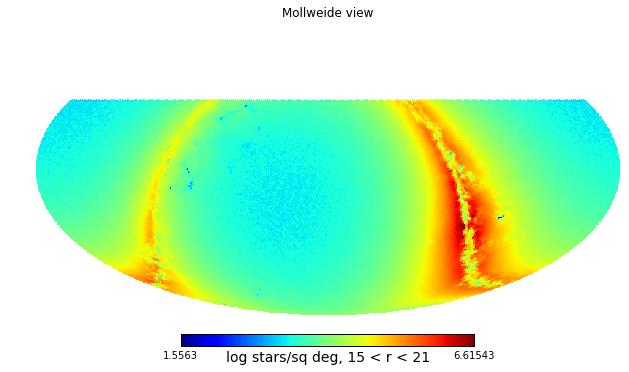

In [4]:
# plot up a sky map of the stellar density at r = 22
good = np.where(np.round(bins*10) == 220)[0].max()
hp.mollview(np.log10(starDensity[:,good-1]), unit='log stars/sq deg, 15 < r < %i' % (bins[good]))

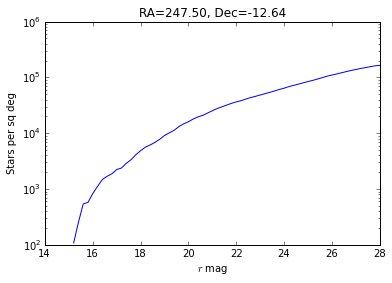

In [5]:
# Look at one spot in the sky
indx = 30000
plt.semilogy(bins[1:], starDensity[indx,:])
plt.xlabel('$r$ mag')
plt.ylabel('Stars per sq deg')
plt.title('RA=%.2f, Dec=%.2f' % (np.degrees(ra[indx]), np.degrees(dec[indx])))